<a href="https://colab.research.google.com/github/xxxcrttt/MLDL/blob/main/MobileNet/moblienetV1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libararies
import keras
keras.__version__

'2.8.0'

In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 导入MoblineNet V1 预训练模型

In [ ]:
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

model = MobileNet(alpha=1.0,                    #宽度超参数
                  depth_multiplier=1,           #分辨率超参数
                  include_top=True,             #是否包含最后的全连接分类层
                  weights="imagenet",           #权重默认为ImageNet的1000个图像分类
                  classes=1000)

17235968/17225924 [==============================] - 0s 0us/step


### MobileNet V2 


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

model2 = MobileNetV2(alpha=1.0,
                     include_top=True,
                     weights="imagenet",
                     classes=1000)

### 探索模型

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

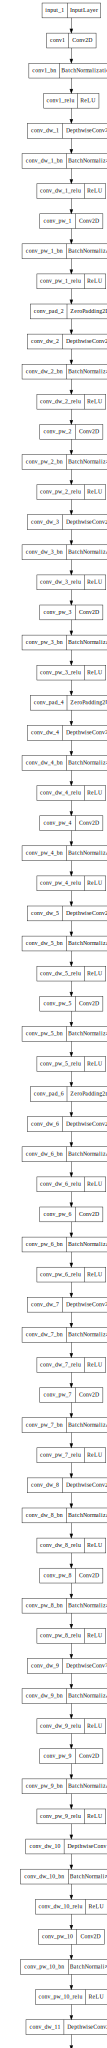

In [ ]:
# 可视化模型结构（GraphViz）
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

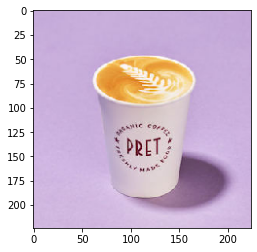

In [ ]:
# 载入图像
img_path= '/content/80z.jpeg'

# 导入图像
from tensorflow.keras.preprocessing import image
img = image.load_img(img_path, target_size=(224, 224))

plt.imshow(img)
plt.show()

In [ ]:
# 预处理
x = image.img_to_array(img)
x.shape

(224, 224, 3)

In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
x = preprocess_input(x)
x

array([[[[0.52156866, 0.3176471 , 0.67058825],
         [0.5294118 , 0.32549024, 0.6784314 ],
         [0.5372549 , 0.33333337, 0.6862745 ],
         ...,
         [0.5294118 , 0.30980396, 0.6862745 ],
         [0.5294118 , 0.30980396, 0.6862745 ],
         [0.5294118 , 0.30980396, 0.6862745 ]],

        [[0.52156866, 0.3176471 , 0.67058825],
         [0.5294118 , 0.32549024, 0.6784314 ],
         [0.5372549 , 0.33333337, 0.6862745 ],
         ...,
         [0.5294118 , 0.30980396, 0.6862745 ],
         [0.5294118 , 0.30980396, 0.6862745 ],
         [0.5294118 , 0.30980396, 0.6862745 ]],

        [[0.5294118 , 0.32549024, 0.6784314 ],
         [0.5294118 , 0.32549024, 0.6784314 ],
         [0.54509807, 0.3411765 , 0.69411767],
         ...,
         [0.5294118 , 0.30980396, 0.6862745 ],
         [0.5294118 , 0.30980396, 0.6862745 ],
         [0.5294118 , 0.30980396, 0.6862745 ]],

        ...,

        [[0.6627451 , 0.45098042, 0.77254903],
         [0.6392157 , 0.427451  , 0.7490196 ]

In [ ]:
# 运行图像分类，解析预测结果
preds = model.predict(x)
preds.shape

(1, 1000)

In [ ]:
preds

array([[1.77014570e-09, 9.27670555e-07, 1.03731466e-07, 3.98521820e-07,
        9.30935897e-08, 1.62339362e-07, 4.17089048e-08, 1.23041161e-07,
        2.57716607e-07, 1.28062183e-07, 6.41145306e-08, 1.96940366e-08,
        5.70212990e-07, 1.61458374e-07, 1.54657769e-07, 2.65795222e-07,
        9.55403010e-08, 4.94386185e-08, 1.39999884e-07, 1.98096131e-07,
        8.90301664e-08, 2.44048306e-06, 8.54917516e-07, 4.29485709e-07,
        1.15706243e-07, 1.81439663e-08, 3.24669291e-09, 2.51137067e-07,
        2.51184353e-08, 1.80699899e-08, 7.95413602e-09, 5.02555864e-08,
        7.02606755e-08, 4.37736283e-08, 7.65467618e-08, 7.69602604e-10,
        3.49640561e-09, 1.09025977e-09, 2.75636296e-07, 4.04877937e-07,
        2.12391569e-07, 1.18784458e-08, 1.38464209e-08, 2.34319344e-07,
        3.20107496e-08, 3.85930470e-08, 1.99635522e-07, 3.53757312e-09,
        6.78039347e-10, 2.90214750e-08, 3.81849858e-08, 1.10058798e-08,
        1.40690179e-06, 1.70018936e-07, 1.17441346e-08, 2.766081

In [ ]:
np.sum(preds)

0.9999999

In [ ]:
decode_predictions(preds, top=5)
# 输出结果为 WordNet编码 & 类别名称 & 置信度概率

49152/35363 [=========================================] - 0s 0us/step


[[('n07920052', 'espresso', 0.6947204),
  ('n03843555', 'oil_filter', 0.060033),
  ('n07930864', 'cup', 0.055144988),
  ('n03690938', 'lotion', 0.039612167),
  ('n03937543', 'pill_bottle', 0.028589044)]]

## 视频处理（每帧）

In [ ]:
import numpy as np
import cv2

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input, decode_predictions

In [ ]:
def process_frame(img2):
  # 记录该帧开始处理的时间
  start_time = time.time()

  img_copy = img2 

  # BGR 转 RGB
  img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
  # 缩放至224 x 224
  img2 = cv2.resize(img2, (224,224))
  x = np.expand_dims(img2, axis=0)
  # 预处理
  x = preprocess_input(x)

  # 获取图像分类预测结果
  preds = model.predict(x)
  results = decode_predictions(preds, top=2)

  # 遍历result变量中的每一个元素并写下
  for idx, result in enumerate(results[0]):
    text1 = '{<10} {:>.4f}'.format(result[1], result[2])

    img2 = cv2.putText(img_copy, text1, (25, 80 + 40 * idx))

  # 记录该帧处理完毕的时间
  end_time = time.time()
  # 计算每秒处理图像帧数FPS
  FPS = 1/(end_time - start_time)

  scaler = 1

  return img_copy

In [ ]:
# 调用摄像头获取每帧（模版）
import cv2
import time 

cap = cv2.VideoCapture(1)

# 打开cap
cap.open(0)

# 无线循环，直到触发break
while cap.isOpened():
  # 获取画面
  success, frame = cap.read()
  if not success:
    break

  # 处理帧函数
  frame = process_frame(frame)

  # 展示处理后的三通道图像
  cv2.imshow('video', frame)

  if cv2.waitKey(1) in [ord('q'),27]: # q退出
    break

# 关闭摄像头
cap.release()

# 关闭图像窗口
cv2.destroyAllWindows()